# Qiskit Fall Fest USC - Entrelazamiento y Teleportación

- Juan Santos Suárez juan.santos.suarez@rai.usc.es

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector
from qiskit.quantum_info import Statevector
#import qiskit.tools.jupyter
#%qiskit_version_table
#%qiskit_copyright
#%config InlineBackend.figure_format = 'retina'

En esta clase vamos a hablar de cómo la estructura algebráica de la Mecánica Cuántica, en particular las propiedades conocidas como superposición y entrelazamiento pueden utilizarse para el procesamiento y transmisión de información

# Entrelazamiento y Estados de Bell

Una de las mayores peculiaridades de la mecánica cuántica es lo que se conoce como *entrelazamiento cuántico*, que es el hecho de que las propiedades de un sistema físico no pueden definirse a partir de estados definidos en cada uno de sus componentes, sino que hay que tratarlos de manera conjunta.

De manera matemática, esto implica que no siempre podremos escribir un estado como

$$|\psi\rangle = |\phi_1\rangle \otimes |\phi_2\rangle.$$

Estado factorizable:
    $$|++\rangle = \frac{1}{2}\left(|00\rangle+|01\rangle+|10\rangle+|11\rangle\right) = \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)\otimes\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)$$
    
Estado entrelazado:
$$|\psi^+\rangle = \frac{1}{\sqrt{2}} \left(|01\rangle+|10\right\rangle)$$

En particular, este último estado es uno de los estados de Bell, que son estados maximalmente entrelazados.

Supongamos que tenemos a dos personas, Alice y Bob que comparten un estado de dos qubits

$$|\phi^+\rangle = \frac{1}{\sqrt{2}} \left(|0\rangle_A|0\rangle_B+|1\rangle_A|1\rangle_B\right)$$

Esto quiere decir que tienen una superposición tal que si, por ejemplo, Alice mide su cúbit hay un $50 \%$ de probabilidades de que *ambos* obtengan el resultado $0$ y un $50\%$ de que obtengan el resultado $1$.

Pero, ¿Qué ocurre si Alice y Bob se separan una gran distancia antes de realizar sus medidas?

Según la Mecánica Cuántica, hasta que Alice no mida su cúbit, la propiedad que va a medir no está determinada, y tampoco la de Bob. Sin embargo, en cuanto mida, ambas se determinarán de manera instantánea, sin importar la distancia a la que se encuentren.

Esto, se consideró en un principio la prueba de que la mecánica cuántica estaba incompleta, ya que tendría que haber una interacción más rápida que la velocidad de la luz (no local). Como alternativa, se pensaba que tendría que haber una teoría determinista que aún no estaríamos entendiendo.

Sin embargo, en 1964, John Bell probó de manera teórica las llamadas desigualdades de Bell. Si estas se violasen, implicaría que necesariamente la naturaleza se estaría comportando de manera probabilística y habría que descartar el realismo local.

Este año, Alain Aspect, John Clauser y Anton Zeilinger han ganado el premio Nobel de Física por demostrar experimentalmente que las desigualdades de Bell se violan, confirmando la veracidad de la Mecánica Cuántica.

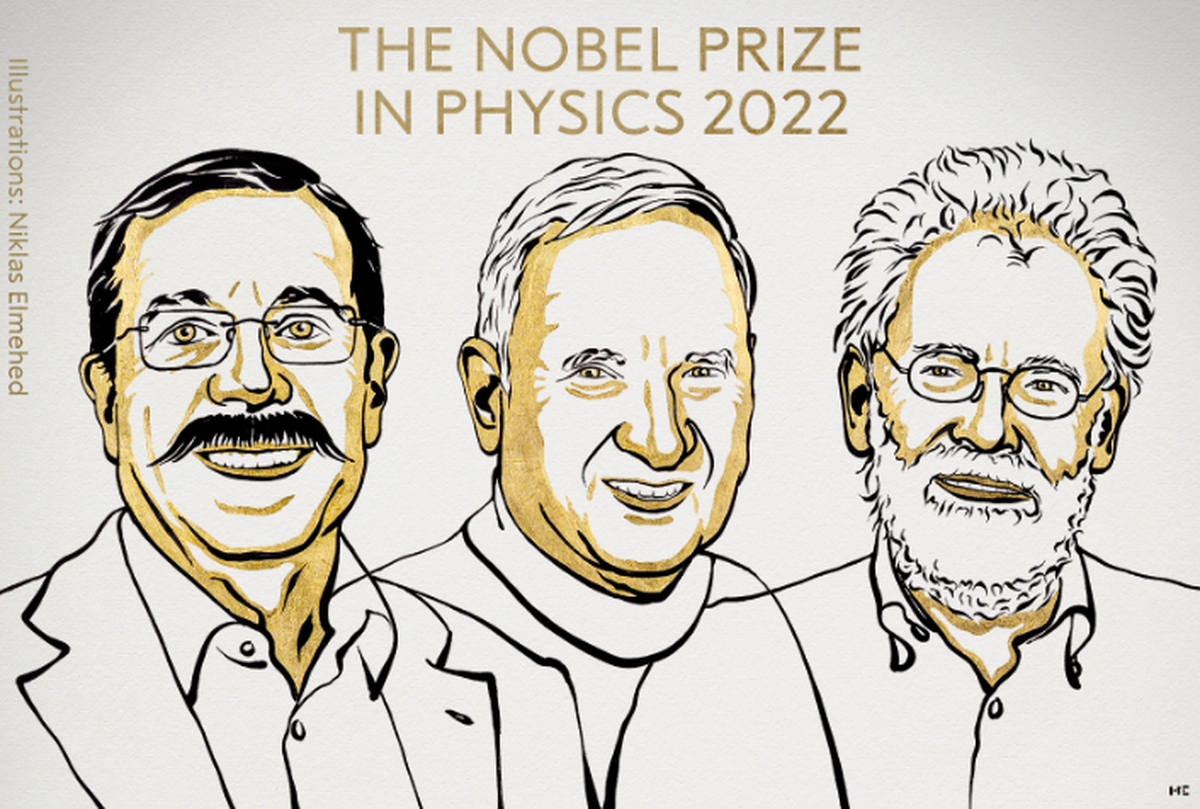

En el *challenge* correspondiente a esta parte veremos un tipo de desigualdad de Bell formulada por John Clauser, Michael Horne, Abner Shimony, and Richard Holt; la desigualdad CHSH.

# Teleportación Cuántica

<center><img src="images/telep_meme.png" width='700' height='160'/><center>
Imagen de ${\bf[1]}$.

Imaginemos una persona, Alice, quiere enviar el estado de un cúbit $|\psi\rangle=\alpha|0\rangle+\beta|1\rangle$ a otra persona, Bob. 

Lo más intuitivo sería mandar este cúbit por un canal cuántico, pero aprovechando las correlaciones que existen entre estados entrelazados, se puede teleportar la información sin tener que enviarla directamente.


Una lectura muy recomendada de uno de los padres de la teleportación, se puede encontrar en https://arxiv.org/abs/quant-ph/0304158.

Los pasos que comprende el protocolo de teleportación son los siguientes: 

1.   Inicialmente Alice y Bob comparten un estado de dos cúbits entrelazado, un estado de Bell $|\phi^+\rangle$.  

2. Alice entrelaza su estado $|\psi\rangle$ de un cúbit con el del estado de Bell que ella tiene. 

3. Alice mide sus dos cúbits y el colapso produce un efecto en el estado que tiene Bob.

4. Alice envía el resultado de sus medidas (2 bits) a Bob por un canal clásico. Bob, a su recepción, efectúa una operación concreta en su cúbit y reconstruye así $|\psi\rangle$ en su laboratorio.

El esquema global del protocolo se resume en el siguiente circuito. 

<center><img src="images/teleportacion.png" width="1200"/><center>


Lo primero que haremos será incializar el circuito, dotado de tres cubits y dos canales clásicos en dos registros. Alice tendrá control sobre los dos primeros $q_0, q_1$ y Bob sobre el tercero $q_2$.

In [ ]:
# Creamos 3 registros cuánticos
qr  = QuantumRegister(3, name="q")

# Creamos dos registros clásicos con nombres diferentes
crz = ClassicalRegister(1, name="crz") 
crx = ClassicalRegister(1, name="crx") 

# Creamos el circuito
qc  = QuantumCircuit(qr, crz, crx) # O QuantumCircuit(3, 2)

qc.draw('mpl')

- Paso 1

En primer lugar, vamos a analizar qué ocurre en el recuadro azul.

Al actuar con esta combinación de puertas sobre el estado $|00\rangle$ tenemos

$$CNOT\left(H\otimes \mathbb{1}\right)|00\rangle \rightarrow CNOT\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)|0\rangle \rightarrow \frac{1}{\sqrt{2}}\left(|00\rangle + |11\rangle\right) = |\phi^+\rangle$$

Usemos Qiskit para comprobar que esto es correcto

In [ ]:
# Creamos un circuito cuántico de dos cúbits
phi_plus = QuantumCircuit(2)
# Aplicamos la puerta H
phi_plus.h(0)
# Aplicamos la CNOT
phi_plus.cnot(0 ,1)
phi_plus.draw('mpl')

In [ ]:
Statevector(phi_plus).draw('latex')

Si ahora tenemos en cuenta el primer cúbit que está en el estado $|\psi\rangle=a|0\rangle + \beta|1\rangle$

$$
|\psi\rangle\otimes|\phi^+\rangle=\frac{1}{\sqrt{2}}\big(\alpha|000\rangle+\alpha|011\rangle+\beta|100\rangle+\beta|111\rangle\big)
$$

Vamos a implementar este primer paso en nuestro circuito

In [ ]:
# Primero fabricamos un estado aleatorio
psi = random_statevector(2)

#Esta función nos permite meter el estado en q_{0}
init_gate = Initialize(psi) 
init_gate.label = "psi"

# Lo representamos en la esfera de Bloch
plot_bloch_multivector(psi)

In [ ]:
# Lo aplicamos qc
qc.append(init_gate, [0])

# Y creamos el estado de bell en los dos últimos cúbits
qc.h(1)
qc.cnot(1, 2)

# Representamos
qc.draw('mpl')

- Paso 2. 

Alice  entrelaza su estado $|\psi\rangle$ con su cúbit del estado de Bell que comparte con Bob.

$$
\begin{aligned}
&(H \otimes I \otimes I)(C N O T \otimes I)(|\psi\rangle \otimes|\phi^+\rangle)=\\
&= (H \otimes I \otimes I)(C N O T \otimes I)\frac{1}{\sqrt{2}}\big(\alpha|000\rangle+\alpha|011\rangle+\beta|100\rangle+\beta|111\rangle\big)=\\
&= (H \otimes I \otimes I) \frac{1}{\sqrt{2}}(\alpha|000\rangle+\alpha|011\rangle+\beta|110\rangle+\beta|101\rangle)=
\end{aligned}
$$

$$
\begin{aligned}
&=\frac{1}{2}(\alpha(|000\rangle+|011\rangle+|100\rangle+|111\rangle)+\beta(|010\rangle+|001\rangle-|110\rangle-|101\rangle)) \\
&=\frac{1}{2} (|00\rangle(\alpha|0\rangle+\beta|1\rangle) +|01\rangle(\alpha|1\rangle+\beta|0\rangle)+|10\rangle(\alpha|0\rangle-\beta|1\rangle) 
+|11\rangle(\alpha|1\rangle-\beta|0\rangle) \\
&=|00\rangle |\psi\rangle + |01\rangle X|\psi\rangle + |10\rangle Z|\psi\rangle + |11\rangle XZ|\psi\rangle
\end{aligned}
$$

In [ ]:
# Implementamos la acción de alice
qc.barrier()
qc.cnot(0, 1)
qc.h(0)

qc.draw('mpl')

- Paso 3

Alice mide en sus dos cúbits y genera dos bits de información. La medida genera un colapso en el cúbit de Bob, generando un estado correlacionado con la medida de Alice según la siguiente tabla:

Bits que Alice mide|  | Estado de Bob
-------- | | --------
00 ||  $|\psi\rangle$ 
01 || $X|\psi\rangle$ 
10 || $Z|\psi\rangle$ 
11 || $XZ|\psi\rangle$ 

In [ ]:
# Medimos los cúbits de Alice
qc.barrier()
qc.measure(1,crx)
qc.measure(0,crz)

qc.draw('mpl')

- Paso 4

El estado de Bob necesita una última reparación para convertirse en $|\psi\rangle$. Para ello,
Bob efectúa una operación sobre el estado que hay en su cúbit, controlada por el 2-bit que recibe de Alice:

Bits que Alice envia  || Operación de Bob
--------  || :--------:
00  || $\operatorname{I}$ 
01  || $\operatorname{X}$ 
10  || $\operatorname{Z}$ 
11  || $\operatorname{ZX}$ 




In [ ]:
# Aplicamos estas operaciones controladas por los bits clásicos

#c_if controla las puertas con un bit clásico en vez de con un cubit
qc.x(2).c_if(crx, 1) # Estas dos líneas verifican
qc.z(2).c_if(crz, 1) # las acciones vistas arriba.

qc.draw('mpl')

Ahora sólo queda ejecutar el circuito y ver en la esfera de Bloch correspondiente a `q2` el mismo estado que teníamos al principio

In [ ]:
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(out_vector)

Nótese que con un circuito verdaderamente sencillo, hemos conseguido transmitir un estado cuántico simplemente mandando dos bits clásicos.

# ¿Clonación?

En el circuito de teleportación hemos podido transmitir un estado de un cúbit a otro, pero, ¿y si pudieramos devolver el cúbit inicial a su estado original?

¿Podemos clonar un estado arbitrario?

<center><img src="images/spiderman.jpg" width='500' height='300'/><center>

En el caso del circuito de teleportación dado que la medida es una operación no unitaria, no podemos recuperar la información original.

Por supuesto, si se sabe preparar $\psi$, se puede resetear el cúbit y volver a prepararlo, pero eso no es clonar, es prepararlo de nuevo y no serviría para un estado arbitrario.

**Teorema**:
no existe un operador unitario $U$ (clonador) que, para un estado arbitrario $|\psi\rangle$, realice la siguiente operación

$$
\fbox{$U |\psi\rangle|0\rangle  = |\psi\rangle|\psi\rangle$} \, 
$$

*Prueba*


Supongamos que dicho operador $U$ de copia existe. Así, para dos estados arbitrarios:

$$
U|\psi\rangle \otimes|0\rangle=|\psi\rangle \otimes|\psi\rangle, \quad U|\phi\rangle \otimes|0\rangle=|\phi\rangle \otimes|\phi\rangle .
$$

Dado que $U$ es un operador lineal, se tiene:


$$
\begin{gathered}
U(\alpha|\psi\rangle+\beta|\phi\rangle) \otimes|0\rangle=\alpha U\left(|\psi\rangle \otimes|0\rangle\right)+\beta U\left(|\phi\rangle \otimes|0\rangle\right)= \\
=\alpha|\psi\rangle \otimes|\psi\rangle+\beta|\phi\rangle \otimes|\phi\rangle .
\end{gathered}
$$

El segundo miembro de esta ultima ecuacion no es la duplicacion del estado $\alpha|\psi\rangle+\beta|\phi\rangle$, que sería:

$$
\begin{aligned}
&(\alpha|\psi\rangle+\beta|\phi\rangle) \otimes(\alpha|\psi\rangle+\beta|\phi\rangle)= \\
&=\alpha^{2}|\psi\rangle \otimes|\psi\rangle+\alpha \beta|\psi\rangle \otimes|\phi\rangle+\beta \alpha|\phi\rangle \otimes|\psi\rangle+\beta^{2}|\phi\rangle \otimes|\phi\rangle
\end{aligned}
$$

Nótese que no hay contradiccion si los terminos cruzados se anulan (es decir si $\alpha=0$ o $\beta=0$). Algunos estados de este tipo se pueden copiar, pero no una combinacion general.

Esta contradicción manifiesta una obstrucción entre las estructuras de *producto* y *suma* en el producto tensorial. Se trata, por tanto, de algo muy fundamental. 

# ¿Comunicación supralumínica?

De igual manera que antes, nos podemos preguntar si es posible hacer esta teleportación más rápido que la velocidad de la luz.

Por supuesto, no es posible debido a que hace falta transmitir información por un canal clásico, que tiene su velocidad limitada.

¿Pero y si tenemos simplemente un estado entrelazado compartido entre Alice y Bob? Sería concebible que, si Alice hace un tipo de medida determinado, otra medida en el estado de Bob permita obtener información.

El [teorema de no comunicación](https://en.wikipedia.org/wiki/No-communication_theorem), que no demostraremos aquí por ser un tanto más avanzado, muestra que Bob no tiene ninguna manera de medir su cúbit que le permita distinguir si Alice ha realizado una medida de algún tipo o no, por lo que tampoco puede distinguir distintos tipos de medidas.

Esto podría evitarse si Bob pudiese hacer copias de su estado después de la medida de Alice y reconstruyese la estadística, pero el teorema de no clonación lo impide.

# Teleportación inspirada en Agujeros de Gusano

El protocolo de teleportación que hemos visto, realmente funciona gracias a las medidas de Alice y su posterior transmisión clásica de los resultados.

En los últimos años, se ha descubierto que en determinados sistemas cuánticos caóticos como el modelo de Sachdev-Ye-Kitaev (SYK) se puede hacer teleportación *mediada por caos*

$$H_{SYK} = \sum_{i_1 ... i_q}^N J_{i_1...i_q} \psi_{i_1}\psi_{i_2}\psi_{i_3}\psi_{i_4}$$

Esencialmente, el caos cuántico consiste en que una perturbación en un sistema se esparce por todos sus grados de libertad, de manera que para recuperarse habría que medir todo el sistema.

En estos nuevos protocolos de teleportación, utilizando dos subsistemas maximalmente caóticos con una interacción entre ellos, una perturbación en uno de los subsitemas acaba apareciendo en el otro

<center><img src="images/WIT.png" width='1000' height='700'/><center>

Desde el punto de vista meramente cuántico, es muy difícil de interpretar cómo demonios puede estar sucediendo esto, pero desde el punto de vista clásico, esto se parece mucho a un agujero de gusano.

De hecho, la dualidad AdS/CFT permite demostrar que efectivamente que cuando se considera un sistema infinitamente grande, esto se comporta *exactamente* igual que un agujero de gusano de Relatividad General.

## Referencias

**[1]** [Teleportation](https://mateusaraujo.info/2017/12/29/what-is-cool-about-quantum-teleportation/) (mateusaraujo.info)

**[2]** [Qiskit](https://qiskit.org/textbook/ch-algorithms/teleportation.html) (Qiskit Manual on teleportation)

**[3]** [Wormhole Inspired Teleportation](https://arxiv.org/abs/2205.14081)